In [258]:
import pandas as pd
import numpy as np
import math
import sys
import seaborn as sns
import os.path
import random
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import combinations
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['mathtext.fontset'] = 'custom'
rcParams['figure.figsize'] = (8,5)
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.rm'] = 'Arial'

In [259]:
colors ={
    "all":"grey",
    "men":"#009E73",
    "women": "#E69F00"   
}

In [260]:
%load_ext autoreload
%autoreload 2
from MobilityDiversityFunctions import MobilityDiversityFunctions
mob = MobilityDiversityFunctions()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [261]:
# You will need a vector of all the options that you have for destinations 
# For instance, a city A have the 10 zones that their codes go from 0 to 9
# So an individual can choose any of these 10 zones to go
all_options = range(10)

In [262]:
# You will need to have a dataframe that have the following three columns
# Column 1: the id of the travel
# Column 2: the expansion factor of the travel
# Column 3: the destination of the travel 
# Column 4: the type of group that you are analysing
fake_data = pd.DataFrame([ [i, random.choice(range(1,100)), \
                            random.choice(range(1,10)), \
                            random.choice(['men','women'])]   for i in range(100)])
fake_data.columns = ['id','expansion_factor','locations','gender']
fake_data.head()

,id,expansion_factor,locations,gender
0,0,48,8,men
1,1,52,7,men
2,2,40,2,women
3,3,77,8,women
4,4,3,1,men


In [263]:
mobility_diversity_values = {}

In [264]:
# Compute the mobility diversity of overall data
mobility_diversity_values["all"] = mob.calculate_mobility_diversity_fast_shuffling_int_expansion_factor(all_options, 
                                             data_group=fake_data,
                                             expansion_column='expansion_factor',
                                             destination_column='locations',
                                             percentage_sample=0.8, 
                                             simulations=30)

In [265]:
for gender in ['men', 'women']:
    # Compute the mobility diversity of each group
    mobility_diversity_values[gender] = mob.calculate_mobility_diversity_fast_shuffling_int_expansion_factor(
                            all_options=all_options, 
                            data_group=fake_data[fake_data['gender']==gender],
                            expansion_column='expansion_factor',
                            destination_column='locations',
                            percentage_sample=0.8, 
                            simulations=30)

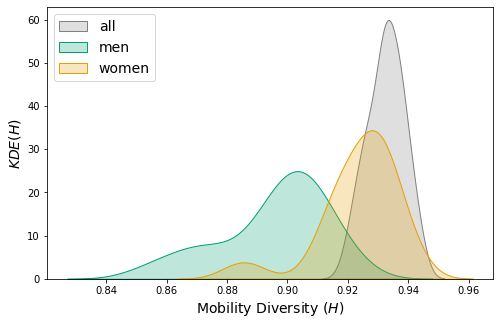

In [266]:
for gender in ['all', 'men', 'women']:
    sns.kdeplot(mobility_diversity_values[gender], shade=True, color=colors[gender], label=gender)
    plt.legend(fontsize=14, loc='upper left')
    plt.xlabel("Mobility Diversity ($H$)", fontsize=14)
    plt.ylabel("$KDE$($H$)", fontsize=14)